In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# 1 Chemical composition of pottery

## 1.1 Data exploration with PCA

### 1.1.1 Import data 

In [2]:
pottery = pd.read_csv('Pottery.csv')

In [3]:
pottery.head()

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20


In [4]:
# Number of columns 
len(pottery.columns)

7

There are 7 columns in the dataset. I would use columns (Al, Fe, Mg, Ca and Na) to run the PCA. 

### 1.1.2 Pre-process the data and perform PCA

In [5]:
pottery_chemical = pottery.iloc[:,2:]

In [6]:
# Scaled to mean-centered 
scaler = StandardScaler()
pottery_chemical_scaled = scaler.fit_transform(pottery_chemical)

In [7]:
# Fit to PCA 
pca = PCA(n_components=3, svd_solver='full')
pca_scores = pca.fit_transform(pottery_chemical_scaled)

### 1.1.3 Plot the cumulative explained variance graph

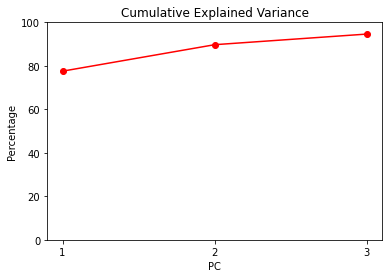

In [8]:
pca.explained_variance_ratio_*100
cumExpVar = np.cumsum(pca.explained_variance_ratio_*100)

fig = plt.figure(figsize=(6,4))
plt.plot(range(1,4),cumExpVar, 'r-o')
plt.ylim(0,100)
plt.xticks(np.arange(1,4))
plt.title('Cumulative Explained Variance')
plt.xlabel('PC')
plt.ylabel('Percentage')
plt.show()

In [9]:
print('The percent of variance of first 2 components: %.2f%%' %cumExpVar[1])
print('The percent of variance of first 3 components: %.2f%%' %cumExpVar[2])

The percent of variance of first 2 components: 89.73%
The percent of variance of first 3 components: 94.62%


### 1.1.4 Plot the scores-loadings graph for PC1-PC2

In [10]:
# Compute scores
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2','PC3']
                         ,index = pottery_chemical.index)
scores_pd['Site'] = pottery['Site']
scores_pd

,PC1,PC2,PC3,Site
0,-1.778026,2.289445,-0.075289,Llanedyrn
1,-0.611193,0.122065,-0.499044,Llanedyrn
2,-0.722428,0.370209,-0.207550,Llanedyrn
3,-1.417696,-0.555600,-0.557590,Llanedyrn
4,-1.486801,-0.004081,0.195248,Llanedyrn
5,-1.259044,-0.092347,-0.783259,Llanedyrn
6,-1.180703,-0.607921,-0.575010,Llanedyrn
7,-1.490385,-0.498745,-0.336582,Llanedyrn
8,-2.076010,0.000500,0.220714,Llanedyrn
9,-2.311320,-0.376341,0.800851,Llanedyrn


In [11]:
# Compute loadings 
loadings_pd = pd.DataFrame(data = pca.components_.T[:,:2]
                           ,columns = ['PC1', 'PC2']
                           ,index = pottery_chemical.columns)
loadings_pd

,PC1,PC2
Al,0.445434,0.356524
Fe,-0.478132,0.041175
Mg,-0.486541,-0.049607
Ca,-0.449054,-0.344146
Na,-0.366888,0.866197


In [12]:
# Unique sites 
scores_pd['Site'].unique()

array(['Llanedyrn', 'Caldicot', 'IsleThorns', 'AshleyRails'], dtype=object)

In [13]:
def pottery_scores_loadings(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores.iloc[:,0].values
    yt = scores.iloc[:,1].values
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    for (x,y), label in zip(np.vstack((xt_scaled[:14], yt_scaled[:14])).T,score_labels[:14]):
        plt.text(x, y, label, color = 'g', ha='center', size=12)
    for (x,y), label in zip(np.vstack((xt_scaled[14:16], yt_scaled[14:16])).T,score_labels[14:16]):
        plt.text(x, y, label, color = 'y', ha='center', size=12)
    for (x,y), label in zip(np.vstack((xt_scaled[16:21], yt_scaled[16:21])).T,score_labels[16:21]):
        plt.text(x, y, label, color = 'b', ha='center', size=12)
    for (x,y), label in zip(np.vstack((xt_scaled[21:], yt_scaled[21:])).T,score_labels[21:]):
        plt.text(x, y, label, color = 'm', ha='center', size=12)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5, head_width=0.03, width=0.005)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=14)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=14);
    plt.ylabel("PC{}".format(2), fontsize=14);
    plt.tick_params(labelsize=12)
    plt.grid()

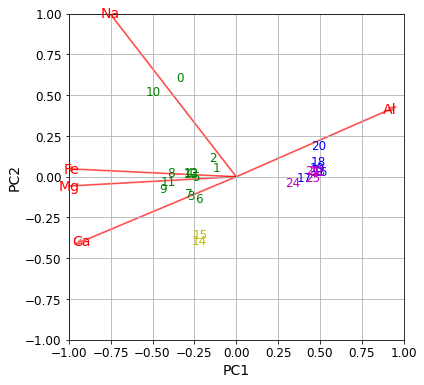

In [14]:
plt.rcParams["figure.figsize"] = [6,6]
pottery_scores_loadings(scores_pd,loadings_pd,loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

The green samples are from Llanedyrn, the yellow samples are from Caldicot, and the blue samples are from IsleThorns, and the purple samples are from AshleyRails. 

### 1.1.5 Explain the reasons

According the above graph, the samples from IsleThorns and AshleyRails are in the same cluster. They have higher concentration in Al and lower concentration in Na, Fe, Mg and Ca. And that might be the raw material requirement to make product B. 

### 1.1.6 Replacement


I don't think raw materials from Caldicot is a good replacement for Llanedyrn. From the above graph, samples from Llanedyrn are concentrated in Na, Fe, Mg and Ca. Although samples from Caldicot have a similar concentration in Fe, Mg and Ca. Their concentration in Na is very low. It might not meet the requirement to make product A.  

### 1.1.7 Biggest difference

The biggest difference in the two big clusters are concentration difference in Fe, Mg, Ca and Al. The cluster with samples from IsleThorns and AshleyRails have higher concentration in Al. And the cluster with samples from Caldicot and Llanedyrn have higher concentration in Fe, Mg and Ca. The samples from Caldicot are less concentrated in Na than the samples from Llanedyrn. In other words, their cluster has large variation in the concentration of Na. By contrast, samples from IsleThorns and AshleyRails are almost the same. 

### 1.1.8 Boxplot of 5 variables 

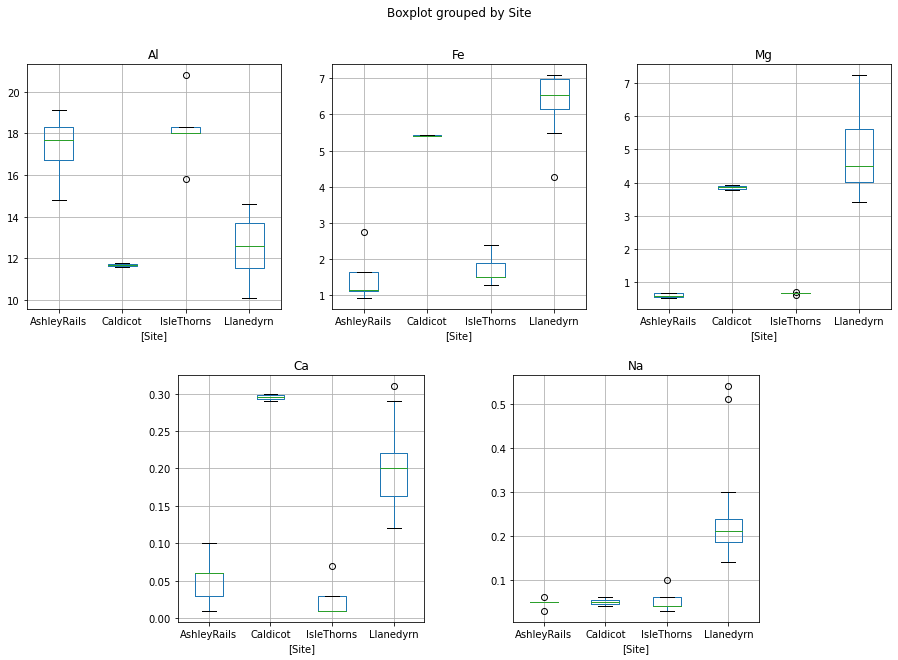

In [15]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)
pottery.boxplot(column=['Al'],by=['Site'], ax=axes[0][0])
pottery.boxplot(column=['Fe'],by=['Site'], ax=axes[0][1])
pottery.boxplot(column=['Mg'],by=['Site'], ax=axes[0][2])
pottery.boxplot(column=['Ca'],by=['Site'], ax=axes[1][0])
pottery.boxplot(column=['Na'],by=['Site'], ax=axes[1][1])
axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
plt.show()

# 2 Batch data analysis

## 2.1 Build a batch statistical process control model

### 2.1.1 Import the data

In [16]:
reference = pd.read_excel('bakers_yeast_reference_batches.xlsx')

In [17]:
reference.head()

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.328,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.476,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.155,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.011,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.450,39.26990,2636.96,43.6572,5.18145


In [18]:
# Count the number of batches 
print('Number of batches: %d' %reference['BatchID'].nunique())

Number of batches: 16


In [19]:
# Duration per batch
reference.groupby('BatchID')['Time'].max()

BatchID
Ma    13.6667
Na    13.6667
Ta    13.6667
Va    13.6667
Xa    13.6667
bb    13.6667
cb    13.6667
db    13.6667
eb    13.6667
fb    13.6667
gb    13.6667
hb    13.6667
ib    13.6667
jb    13.6667
kb    13.6667
lb    13.6667
Name: Time, dtype: float64

In [20]:
# Count data points per batch
reference.groupby('BatchID')['BatchID'].count()

BatchID
Ma    83
Na    83
Ta    83
Va    83
Xa    83
bb    83
cb    83
db    83
eb    83
fb    83
gb    83
hb    83
ib    83
jb    83
kb    83
lb    83
Name: BatchID, dtype: int64

The duration per batch is 13.6667. There are 83 data points in each batch. There are eight variables measured. 

### 2.1.2 Plot the variables time-profiles

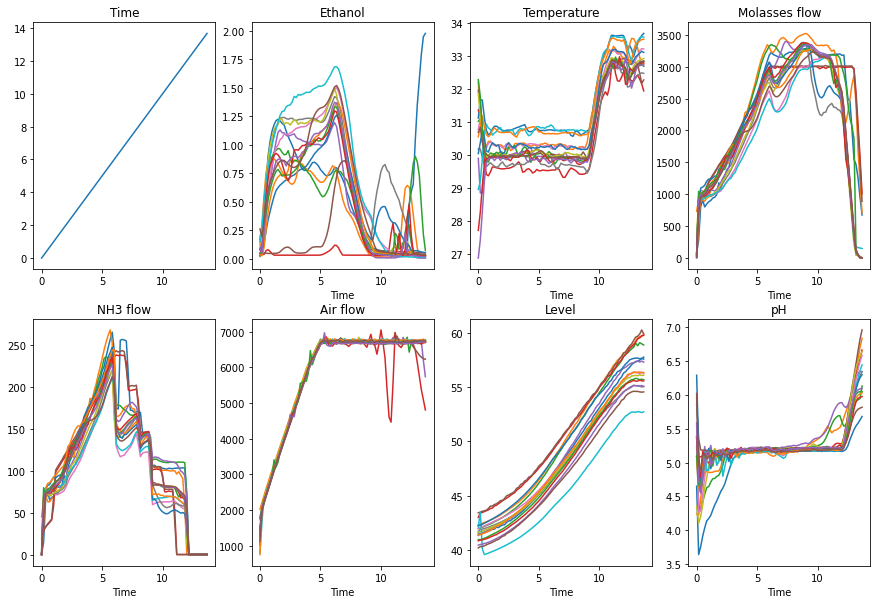

In [21]:
fig, axes = plt.subplots(2,4, figsize=(15,10))

reference.set_index('Time', inplace=True)
axes[0][0].plot(reference.index, reference.index)
axes[0][0].set_title('Time')
reference.groupby('BatchID')['Ethanol'].plot(title='Ethanol',ax=axes[0,1])
reference.groupby('BatchID')['Temperature'].plot(title='Temperature',ax=axes[0,2])
reference.groupby('BatchID')['Molasses flow'].plot(title='Molasses flow',ax=axes[0,3])
reference.groupby('BatchID')['NH3 flow'].plot(title='NH3 flow',ax=axes[1,0])
reference.groupby('BatchID')['Air flow'].plot(title='Air flow',ax=axes[1,1])
reference.groupby('BatchID')['Level'].plot(title='Level',ax=axes[1,2])
reference.groupby('BatchID')['pH'].plot(title='pH',ax=axes[1,3])

plt.show()

There are some outliers in Ethanol and Air flow, which seem not follow the overall pattern. Temperature has the largest variability as the lines fluctuate a lot. Air flow and Level are tightly controlled as the lines are smooth and follow an obvious increasing trend. 

### 2.1.3 Select the features and pre-process the data

In [22]:
# Reset index 
reference.reset_index(inplace=True)

In [23]:
# Select features 
features = reference[['Time','Ethanol','Temperature','Molasses flow','NH3 flow','Air flow','Level','pH']]

In [24]:
# Scaling
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [25]:
# Fit to PCA 
pca = PCA(n_components=5, svd_solver='full')
pca_scores = pca.fit_transform(features_scaled)

In [26]:
# Compute scores 
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = features.index)
scores_pd['BatchID']=reference['BatchID']
scores_pd['Time']=reference['Time']
scores_pd

,PC1,PC2,PC3,PC4,PC5,BatchID,Time
0,-0.808176,4.508288,-0.200368,1.295502,-0.754945,bb,0.000000
1,-1.303347,3.391210,0.824346,0.666865,-0.552935,bb,0.166667
2,-1.630004,3.073121,1.085677,0.706676,-0.168488,bb,0.333333
3,-1.790453,2.816650,1.059588,0.979711,0.160562,bb,0.500000
4,-1.811100,2.636318,1.033483,1.094550,0.294213,bb,0.666667
...,...,...,...,...,...,...,...
1323,3.772295,2.368292,-1.644665,0.830572,-0.163892,Xa,13.000000
1324,3.875235,2.595895,-1.942104,0.980115,-0.265168,Xa,13.166700
1325,3.963794,2.665704,-2.074648,1.041445,-0.323446,Xa,13.333300
1326,3.900935,2.872436,-2.046092,1.108283,-0.312934,Xa,13.500000


In [27]:
# Compute loadings 
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1','PC2','PC3','PC4','PC5']
                           ,index = features.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


### 2.1.4 Pivot the scores BatchID with index Time

In [28]:
pivoted = pd.pivot_table(scores_pd, values=['PC1','PC2'], index=['Time'],
                columns=['BatchID'])
pivoted

PC1                                                    \
BatchID          Ma        Na        Ta        Va        Xa        bb   
Time                                                                    
0.000000  -2.575226 -2.494768 -1.834810 -1.935067 -1.953438 -0.808176   
0.166667  -3.406333 -2.944182 -2.731785 -1.704701 -3.044833 -1.303347   
0.333333  -3.390333 -3.070940 -3.117042 -1.841620 -3.172201 -1.630004   
0.500000  -3.534499 -2.888284 -3.194946 -2.016330 -2.751431 -1.790453   
0.666667  -3.596972 -2.732277 -3.165646 -2.107667 -2.436144 -1.811100   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.489762  4.277071  3.184812  4.033208  3.772295  4.373225   
13.166700  2.481818  4.552587  3.157697  4.097282  3.875235  4.485736   
13.333300  2.421492  4.641010  3.372776  4.055942  3.963794  4.556764   
13.500000  2.397535  4.702980  3.579729  4.048033  3.900935  4.617689   
13.666700  2.442108  4.826890  3.850841  3.985137  3.808085  4.695344   

                                                   ...       PC2            \
BatchID          cb        db        eb        fb  ...        cb        db   
Time                                               ...                       
0.000000  -1.732160 -1.483465 -2.607604 -2.574646  ...  4.172215  4.470604   
0.166667  -2.818163 -2.245863 -3.134312 -3.146375  ...  2.540984  2.899993   
0.333333  -3.018590 -3.095891 -3.340362 -3.181104  ...  2.158644  2.263694   
0.500000  -2.938017 -3.043336 -3.349177 -2.775636  ...  2.081301  2.164333   
0.666667  -2.735993 -2.909978 -3.199772 -2.511582  ...  2.092789  2.116105   
...             ...       ...       ...       ...  ...       ...       ...   
13.000000  3.610527  3.231240  3.730375  3.293611  ...  2.382466  2.302893   
13.166700  3.812695  3.385515  3.900761  3.531415  ...  2.643571  2.543902   
13.333300  4.008694  3.523197  4.035689  3.730366  ...  2.764020  2.592414   
13.500000  4.187002  3.613033  4.143437  3.877819  ...  2.820531  2.641512   
13.666700  4.289330  3.696612  4.246451  3.984240  ...  2.871297  2.653942   

                                                                       \
BatchID          eb        fb        gb        hb        ib        jb   
Time                                                                    
0.000000   3.554477  4.149466  4.449511  4.372609  4.444302  3.828360   
0.166667   2.348252  2.407770  3.072537  3.231825  2.634995  2.297575   
0.333333   2.129573  2.241038  2.303929  2.433267  2.412479  2.219796   
0.500000   1.985558  2.379850  2.245527  2.364956  2.218739  2.316750   
0.666667   1.959988  2.338443  2.137595  2.232071  2.126980  2.198631   
...             ...       ...       ...       ...       ...       ...   
13.000000  2.538533  2.489287  2.302206  2.335286  2.329692  2.248336   
13.166700  2.683711  2.643851  2.545708  2.557955  2.525629  2.472965   
13.333300  2.759799  2.720342  2.638606  2.629966  2.569471  2.538191   
13.500000  2.800656  2.771724  2.690025  2.644995  2.586888  2.570166   
13.666700  2.833696  2.797303  2.711540  2.679550  2.593956  2.565875   

                               
BatchID          kb        lb  
Time                           
0.000000   3.798099  4.604813  
0.166667   2.230043  3.134584  
0.333333   1.976018  2.497215  
0.500000   2.115469  2.378954  
0.666667   2.159850  2.240126  
...             ...       ...  
13.000000  2.320954  2.156522  
13.166700  2.524643  2.393586  
13.333300  2.570760  2.454439  
13.500000  2.603834  2.488889  
13.666700  2.607499  2.506720  

[83 rows x 32 columns]

### 2.1.5 Plot scores-loadings plot

In [29]:
def reference_scores_loadings(scores,loadings,loading_labels=None):
    xt = scores.iloc[:,:16].values
    yt = scores.iloc[:,16:32].values
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    # scaling
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    plt.plot(xt_scaled, yt_scaled)
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5, head_width=0.03, width=0.005)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.hlines(0, -1, 1, linestyles='solid',colors='Black', linewidth=2)
    plt.vlines(0, -1, 1, linestyles='solid',colors='Black', linewidth=2)
    
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=16);
    plt.ylabel("PC{}".format(2), fontsize=16);
    plt.tick_params(labelsize=14)
    plt.grid()
    return 

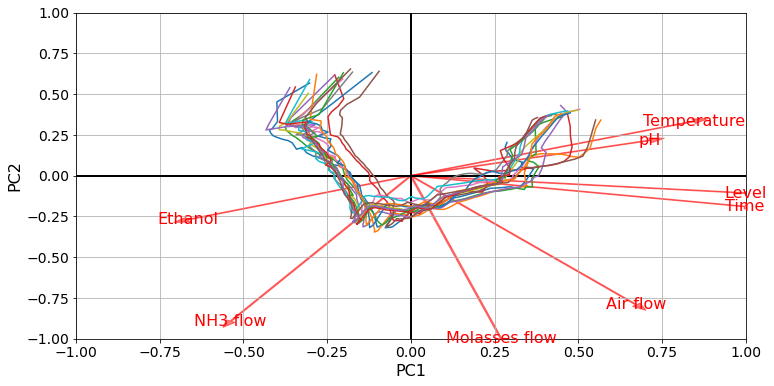

In [30]:
plt.rcParams["figure.figsize"] = [12,6]
reference_scores_loadings(pivoted,loadings_pd,loading_labels=loadings_pd.index)
plt.show()

### 2.1.6 Explain this graph

The batches start at the top left quarter and end at the top right quarter as time always increases. Initially, ethanol and NH3 was fed to the batch until the first phase. During the first phase, the feed of ethanol and NH3 become constant. The molasses flow and air flow was increasely fed to the batch. After the kink (bottom left), the molasses and air flow become constant, but ethanol and NH3 flow decrease. Then temperature and pH start to increase. Time and level always increase. In the first phase, ethanol and NH3 flow do not change. In the second phase, molasses flow and air flow do not change.

### 2.1.7 Plot the cumulative explained variance

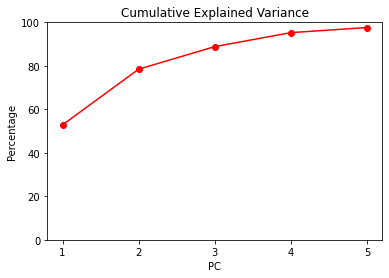

In [31]:
pca.explained_variance_ratio_*100
cumExpVar = np.cumsum(pca.explained_variance_ratio_*100)
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,6),cumExpVar, 'r-o')
plt.ylim(0,100)
plt.xticks(np.arange(1,6))
plt.title('Cumulative Explained Variance')
plt.xlabel('PC')
plt.ylabel('Percentage')
plt.show()

In [32]:
print('The first two principal components capture %.2f%% variance'%cumExpVar[1])

The first two principal components capture 78.47% variance


## 2.2 Use the model to monitor running batches

### 2.2.1 Load the data and repeat 3-4 procedures

In [33]:
batches = pd.read_excel('todays_batches.xlsx')

In [34]:
batches.head()

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967


In [35]:
# Select features 
batches_features = batches.iloc[:,3::]

In [36]:
# Transform features 
batches_features_scaled = scaler.transform(batches_features)
# Fit to PCA
pca_scores = pca.transform(batches_features_scaled)

In [37]:
# Compute scores 
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2','PC3','PC4','PC5']
                         ,index = batches_features.index)
scores_pd['BatchID']=batches['BatchID']
scores_pd['Time']=batches['Time']
scores_pd

,PC1,PC2,PC3,PC4,PC5,BatchID,Time
0,-3.096781,3.798958,1.166746,0.602916,0.937231,Ya,0.000000
1,-3.715861,3.216763,2.529801,-1.183846,0.839431,Ya,0.166667
2,-3.928722,2.972255,1.411527,-2.217525,1.037556,Ya,0.333333
3,-4.362027,1.145315,-0.230988,-2.807162,1.130690,Ya,0.500000
4,-4.476710,1.268811,-2.409623,-3.259502,1.559791,Ya,0.666667
...,...,...,...,...,...,...,...
161,4.177559,2.589581,-2.097027,0.924135,-0.524341,Za,13.000000
162,4.329929,2.726441,-2.361650,1.062921,-0.615614,Za,13.166700
163,4.401519,2.857172,-2.506579,1.158278,-0.667658,Za,13.333300
164,4.462603,2.853649,-2.596933,1.205385,-0.682489,Za,13.500000


In [38]:
# Compute loadings 
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1','PC2','PC3','PC4','PC5']
                           ,index = batches_features.columns)
loadings_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


In [39]:
batches_pivoted = pd.pivot_table(scores_pd, values=['PC1','PC2'], index=['Time'],
                columns=['BatchID'])
batches_pivoted

PC1                 PC2          
BatchID          Ya        Za        Ya        Za
Time                                             
0.000000  -3.096781 -0.660359  3.798958  4.613764
0.166667  -3.715861 -2.032155  3.216763  2.849667
0.333333  -3.928722 -2.734359  2.972255  2.229773
0.500000  -4.362027 -2.523621  1.145315  2.247428
0.666667  -4.476710 -2.356751  1.268811  2.592231
...             ...       ...       ...       ...
13.000000  1.684309  4.177559  1.398034  2.589581
13.166700  1.770673  4.329929  1.426290  2.726441
13.333300  1.869276  4.401519  1.470466  2.857172
13.500000  1.932977  4.462603  1.699221  2.853649
13.666700  1.646827  4.510675  2.394997  2.868612

[83 rows x 4 columns]

### 2.2.2 Plot scores-loadings

In [40]:
def batches_scores_loadings(scores,loadings,loading_labels=None):
    xt = scores.iloc[:,:2].values
    yt = scores.iloc[:,2:].values
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    
    # scaling
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    plt.plot(xt_scaled, yt_scaled,'--')
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5, head_width=0.03, width=0.005)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.hlines(0, -1, 1, linestyles='solid',colors='Black', linewidth=2)
    plt.vlines(0, -1, 1, linestyles='solid',colors='Black', linewidth=2)
    
    plt.xlim(-0.7,0.7)
    plt.ylim(-0.7,0.7)
    plt.xlabel("PC{}".format(1), fontsize=16);
    plt.ylabel("PC{}".format(2), fontsize=16);
    plt.legend(['Ya','Za'])
    plt.tick_params(labelsize=14)
    plt.grid()
    return 

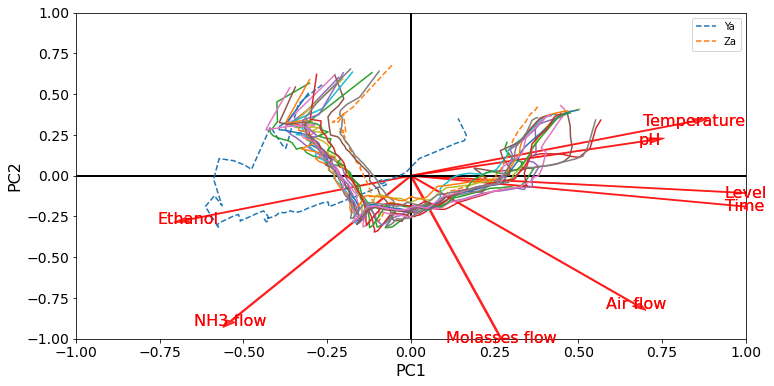

In [41]:
plt.rcParams["figure.figsize"] = [12,6]
batches_scores_loadings(batches_pivoted,loadings_pd,loading_labels=loadings_pd.index)
reference_scores_loadings(pivoted,loadings_pd,loading_labels=loadings_pd.index)
plt.show()

### 2.2.3 Batches bahaviour

The batch Za almost follow the same behaviour as the reference batches. However, the batch Ya seems an outlier. The ethanol flow continues to increase during the first phase, and end up at a much higher concentration than other reference batches. It also has lower molasses and air flow, and the final temperature and pH is lower than reference batches. It might cause potential problems. 